In [1]:
import pandas
import numpy
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
def remove_comma(df: pandas.DataFrame):
    for column in df.columns:
        df[column].replace(regex=True, inplace=True, to_replace=r',', value='')

def preprocess_data(df_ld, df_td):
    df_ld.drop(['zone_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_td.drop(['station_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_ld.dropna(axis=0, how='any', inplace=True)
    df_td.dropna(axis=0, how='any', inplace=True)
    remove_comma(df_ld)
    df_ld = df_ld.apply(pandas.to_numeric)
    return df_ld, df_td

def scale_data(data):
    temp_data = data.copy()
    scaler = MinMaxScaler()
    temp_data[temp_data.columns] = scaler.fit_transform(temp_data[temp_data.columns])
    return temp_data

In [3]:
load_data = pandas.read_csv('data/Load_history.csv')
load_data = load_data[load_data.zone_id==1]
temperature_data = pandas.read_csv('data/temperature_history.csv')
load_data, temperature_data = preprocess_data(load_data, temperature_data)
display("Statistical description of load data.")
display(load_data.describe())
display("Statistical description of temperature data.")
display(temperature_data.describe())
scaled_load_data = scale_data(load_data)
scaled_temparature_data = scale_data(temperature_data)

'Statistical description of load data.'

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,...,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,15566.875158,14939.773644,14701.155738,14676.210593,15151.133039,16489.778058,18723.658260,19690.397226,19467.936948,19235.775536,...,18905.351198,19323.642497,20187.860025,21467.210593,22219.257881,22216.518916,21966.639975,20985.850567,18998.580076,16973.685372
std,4419.229985,4655.497558,4920.430462,5195.229949,5505.013520,5911.689452,6344.603398,6128.042050,5320.095577,4568.957880,...,6063.795583,6350.067132,6369.829512,6186.807908,5830.669857,5216.640622,4733.941549,4578.388220,4346.468770,4281.745642
min,8078.000000,7438.000000,7392.000000,7319.000000,7755.000000,9031.000000,9712.000000,11437.000000,11864.000000,11509.000000,...,9575.000000,9900.000000,10960.000000,13042.000000,13466.000000,12934.000000,12660.000000,12722.000000,11081.000000,9196.000000
25%,11930.750000,11281.750000,10938.250000,10783.250000,11046.250000,12205.500000,14378.250000,15256.000000,15295.000000,15609.250000,...,14198.750000,14260.250000,15064.750000,16344.250000,17423.750000,18066.750000,18074.500000,17120.500000,15303.250000,13435.250000
50%,14552.000000,13714.500000,13190.000000,12942.500000,13279.000000,14381.500000,16378.000000,17304.500000,17846.500000,18300.000000,...,16634.000000,17009.000000,17925.000000,19786.500000,20940.500000,21104.500000,20957.000000,20046.500000,18170.500000,16171.000000
75%,18013.250000,17250.750000,16906.750000,17073.250000,17937.750000,19671.500000,22452.250000,23288.000000,22306.000000,21746.750000,...,22416.000000,22923.000000,23905.250000,25646.500000,26232.500000,25751.250000,25111.750000,24061.250000,21929.750000,19639.500000
max,38219.000000,39281.000000,40426.000000,41590.000000,43252.000000,45547.000000,44869.000000,45427.000000,45318.000000,40853.000000,...,40888.000000,42263.000000,43149.000000,43486.000000,43327.000000,41446.000000,39475.000000,38902.000000,38066.000000,37652.000000


'Statistical description of temperature data.'

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,...,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000,18062.000000
mean,52.815192,52.185472,51.631547,51.123796,50.669915,50.280811,50.392260,51.847968,54.570369,57.780589,...,66.076514,66.191452,65.648765,64.137914,61.622799,58.850072,56.660946,55.327317,54.342376,53.533994
std,15.704152,15.690957,15.702999,15.708534,15.734907,15.771768,16.125607,17.095942,17.628109,17.594346,...,17.467881,17.318609,17.200823,17.311366,17.393181,16.769876,16.078702,15.858632,15.775466,15.742130
min,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,...,16.000000,16.000000,17.000000,16.000000,14.000000,11.000000,9.000000,7.000000,5.000000,5.000000
25%,40.000000,39.000000,39.000000,38.000000,38.000000,37.000000,37.000000,37.000000,40.000000,43.000000,...,52.000000,52.000000,52.000000,50.000000,47.000000,45.000000,44.000000,42.000000,41.000000,41.000000
50%,54.000000,54.000000,53.000000,53.000000,52.000000,52.000000,52.000000,54.000000,56.000000,60.000000,...,68.000000,68.000000,68.000000,66.000000,63.000000,61.000000,58.000000,57.000000,56.000000,55.000000
75%,66.000000,66.000000,65.000000,64.000000,64.000000,64.000000,64.000000,67.000000,70.000000,73.000000,...,81.000000,81.000000,80.000000,79.000000,77.000000,73.000000,71.000000,69.000000,68.000000,67.000000
max,86.000000,85.000000,85.000000,85.000000,83.000000,82.000000,84.000000,87.000000,91.000000,96.000000,...,103.000000,104.000000,103.000000,102.000000,99.000000,97.000000,95.000000,91.000000,92.000000,88.000000


In [4]:
def plot_correlation_matrix(data, correlations):
    names = data.columns
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

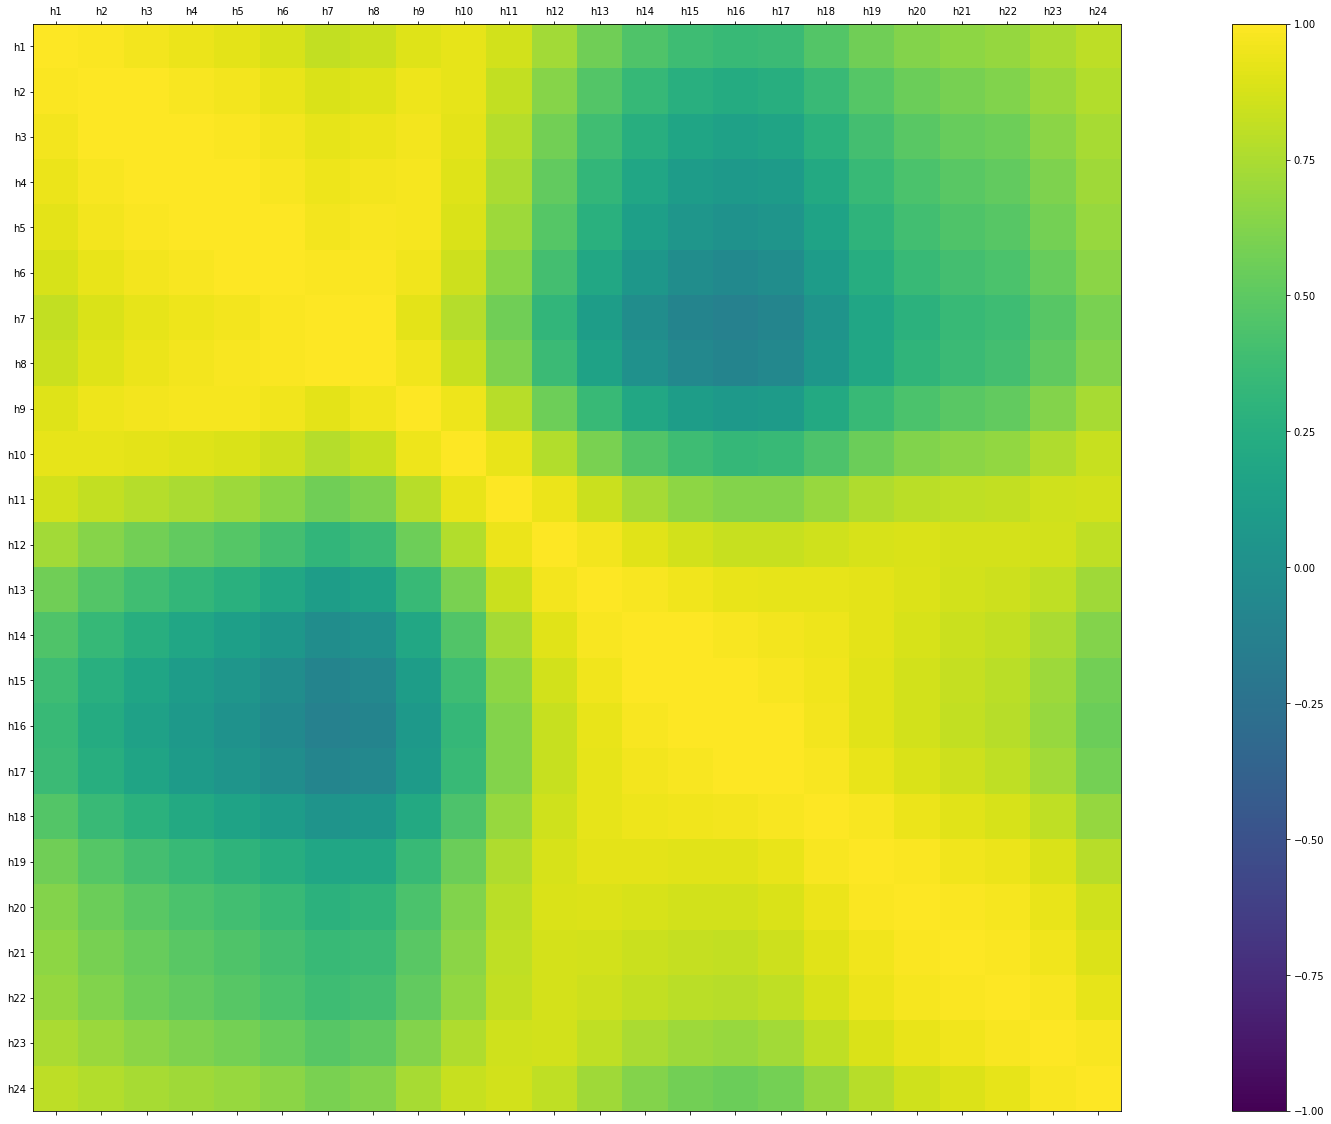

array([  1.59177552e+01,   6.90502700e+00,   6.14148823e-01,
         2.90701339e-01,   1.06003655e-01,   6.52305239e-02,
         3.10749934e-02,   1.94856821e-02,   1.40828249e-02,
         9.42554098e-03,   7.47892370e-03,   4.82053881e-03,
         3.55665173e-03,   2.26177284e-03,   1.68720262e-03,
         1.45205467e-03,   1.28032688e-03,   1.06986869e-03,
         9.55578518e-04,   2.65009940e-04,   7.78668817e-04,
         3.91402871e-04,   5.48976521e-04,   5.17412407e-04])

In [5]:
correlations = scaled_load_data.corr()
plot_correlation_matrix(scaled_load_data, correlations)
eig_vals, eig_vecs = numpy.linalg.eig(correlations)
display(eig_vals)
# Based on the eigenvalues, if we take first five eigenvectors, I think we can capture reasonable variance in data.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(scaled_load_data)
pca_load_data = pca.transform(scaled_load_data)
display('Explained Variance')
display(pca.explained_variance_ratio_)
pca_load_data = pandas.DataFrame(pca_load_data, columns = ['d1','d2','d3','d4','d5','d6'])
net_variance = numpy.sum(pca.explained_variance_ratio_[:2])
display(net_variance)

'Explained Variance'

array([ 0.66358615,  0.28867707,  0.02533286,  0.01136577,  0.00378124,
        0.0029511 ])

0.95226321881891285

'Statistical description of load data'

,d1,d2,d3,d4,d5,d6
count,1.586000e+03,1.586000e+03,1.586000e+03,1.586000e+03,1.586000e+03,1.586000e+03
mean,1.255301e-16,3.629575e-17,-3.496573e-17,-1.629284e-17,3.605075e-18,-2.595304e-17
std,6.907584e-01,4.555999e-01,1.349645e-01,9.040177e-02,5.214283e-02,4.606486e-02
min,-1.263398e+00,-8.830327e-01,-7.243822e-01,-3.141132e-01,-2.103165e-01,-1.533777e-01
25%,-6.022096e-01,-3.562242e-01,-7.423047e-02,-5.688739e-02,-2.976340e-02,-3.070435e-02
50%,-1.416437e-01,-4.757308e-02,-3.042111e-03,-7.606083e-03,4.317707e-04,-2.134746e-03
75%,4.863323e-01,3.321676e-01,8.186956e-02,5.399028e-02,2.819633e-02,2.835233e-02
max,2.388973e+00,1.504250e+00,8.916525e-01,4.169207e-01,2.575654e-01,2.539044e-01


'Scatter mattrix plot of load data'

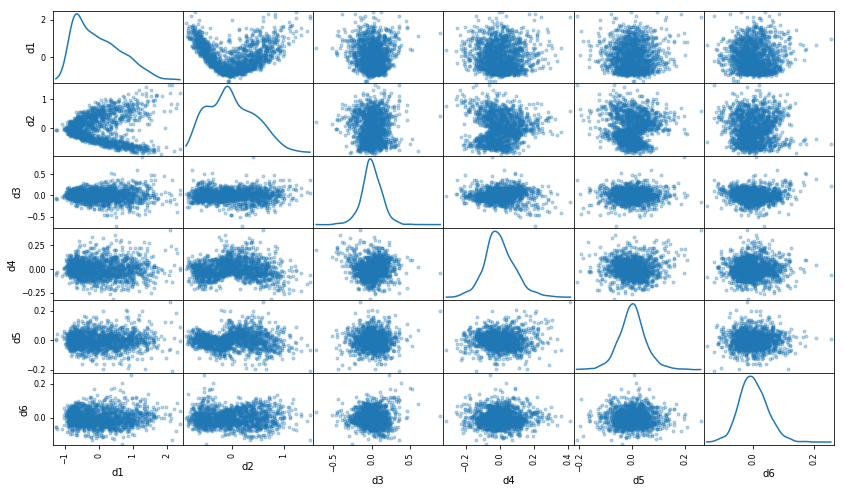

In [7]:
display('Statistical description of load data')
display(pca_load_data.describe())
display('Scatter mattrix plot of load data')
pandas.tools.plotting.scatter_matrix(pca_load_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
pca_load_data.head()

In [ ]:
# pca_load_data.to_csv('pca_load_dataset.csv', sep='\t')

In [107]:
# window the data using your windowing function
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    for window in range(len(series) - window_size):
        X.append(series[window:window+window_size])
        y.append(series.iloc[[window + window_size]])
    true_data = []
    for elem in X:
        temp_list = []
        for column in elem.columns:
            temp_list.append(elem[column])
        true_data.append(temp_list)
    X = true_data
    X = numpy.asarray(X)
    true_data = []
    for elem in y:
        true_data.append(numpy.asarray(elem))
    y = true_data
    y = numpy.asarray(y)
    y.shape = (len(y),24)
    return X,y

window_size = 12
X,y = window_transform_series(series = scaled_load_data, window_size = window_size)

In [108]:
train_test_split = int(numpy.ceil(4*len(y)/float(5)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = numpy.asarray(numpy.reshape(X_train, (X_train.shape[0], window_size, 24)))
X_test = numpy.asarray(numpy.reshape(X_test, (X_test.shape[0], window_size, 24)))
y_train = numpy.asarray(y_train)
y_test = numpy.asarray(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1260, 12, 24) (1260, 24) (314, 12, 24) (314, 24)


In [109]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
numpy.random.seed(0)


model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(24))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 12, 100)           50000     
_________________________________________________________________
lstm_33 (LSTM)               (None, 12, 100)           80400     
_________________________________________________________________
lstm_34 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_22 (Dense)             (None, 24)                2424      
Total params: 213,224
Trainable params: 213,224
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0305

In [111]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))
testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.00727485062939
testing error = 0.00844019717851


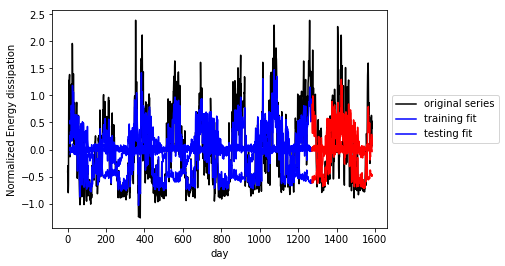

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series/
plt.plot(pca_load_data['d1'],color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(numpy.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(numpy.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('Normalized Energy dissipation')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()